<a href="https://colab.research.google.com/github/charvi-jain/SilverChase-DataDriven-ML-model/blob/main/GoldChase_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and PreProcessing


In [42]:
silver_data = pd.read_csv('/content/SilverPrice.csv')

In [43]:
silver_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2023-08-17 00:00:00.000,1915.2,146770,1922.4,1933.5,1914.2
1,2023-08-16 00:00:00.000,1928.3,124766,1933.1,1938.2,1922.0
2,2023-08-15 00:00:00.000,1935.2,161512,1939.4,1944.3,1927.5
3,2023-08-14 00:00:00.000,1944.0,117514,1945.6,1948.2,1934.2
4,2023-08-11 00:00:00.000,1946.6,119090,1944.9,1953.6,1942.7


In [44]:
silver_data.tail()

,Date,Close/Last,Volume,Open,High,Low
2534,2013-08-23 00:00:00.000,1395.8,149116,1376.1,1399.9,1367.8
2535,2013-08-22 00:00:00.000,1370.8,134493,1365.6,1381.4,1354.5
2536,2013-08-21 00:00:00.000,1370.1,137350,1371.0,1378.9,1359.2
2537,2013-08-20 00:00:00.000,1372.6,130096,1364.9,1378.0,1351.6
2538,2013-08-19 00:00:00.000,1365.7,116056,1377.1,1384.1,1362.0


In [45]:
silver_data.shape

(2539, 6)

In [46]:
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2539 non-null   int64  
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 119.1+ KB


In [47]:
silver_data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [48]:
silver_data.describe()

,Close/Last,Volume,Open,High,Low
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1467.437456,181738.732178,1467.455967,1477.035880,1457.630721
std,282.891621,99358.470659,283.126968,285.232942,280.366732
min,1049.600000,0.000000,1051.500000,1062.700000,1045.400000
25%,1243.900000,121111.500000,1243.850000,1251.250000,1235.800000
50%,1321.400000,171291.000000,1321.700000,1329.300000,1314.000000
75%,1774.050000,232716.000000,1773.950000,1785.000000,1763.550000
max,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000


In [49]:
correlation = silver_data.corr()

<ipython-input-49-0b17aafec16f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = silver_data.corr()


<Axes: >

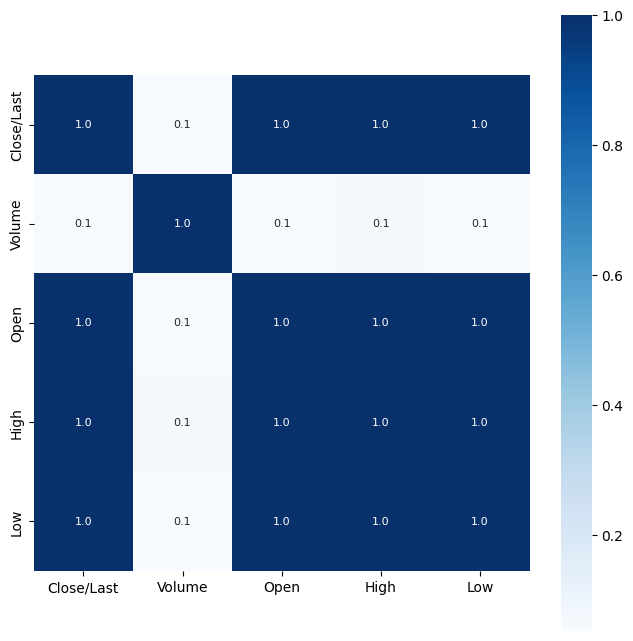

In [50]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [51]:
print(correlation['Close/Last'])

Close/Last    1.000000
Volume        0.057816
Open          0.998913
High          0.999471
Low           0.999527
Name: Close/Last, dtype: float64


<ipython-input-52-e3d55bfa791f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silver_data['Close/Last'],color='red')


<Axes: xlabel='Close/Last', ylabel='Density'>

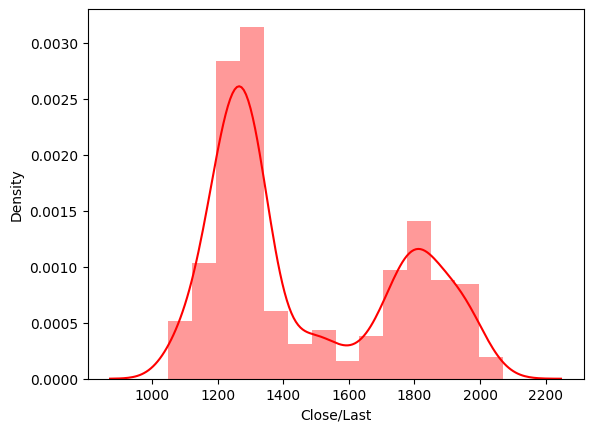

In [52]:
sns.distplot(silver_data['Close/Last'],color='red')

Features and Target

In [53]:
X = silver_data.drop(['Date','Close/Last'],axis=1)
Y = silver_data['Close/Last']

In [54]:
print(X)

      Volume    Open    High     Low
0     146770  1922.4  1933.5  1914.2
1     124766  1933.1  1938.2  1922.0
2     161512  1939.4  1944.3  1927.5
3     117514  1945.6  1948.2  1934.2
4     119090  1944.9  1953.6  1942.7
...      ...     ...     ...     ...
2534  149116  1376.1  1399.9  1367.8
2535  134493  1365.6  1381.4  1354.5
2536  137350  1371.0  1378.9  1359.2
2537  130096  1364.9  1378.0  1351.6
2538  116056  1377.1  1384.1  1362.0

[2539 rows x 4 columns]


In [55]:
print(Y)

0       1915.2
1       1928.3
2       1935.2
3       1944.0
4       1946.6
         ...  
2534    1395.8
2535    1370.8
2536    1370.1
2537    1372.6
2538    1365.7
Name: Close/Last, Length: 2539, dtype: float64


Training and Test Data Splitting

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training

In [57]:
regressor = RandomForestRegressor(n_estimators=100)

In [58]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Evaluation

In [59]:
test_data_prediction = regressor.predict(X_test)

In [60]:
print(test_data_prediction)

[1780.88  1795.429 1237.482 1285.079 1467.213 1726.363 1930.259 1660.204
 1354.826 1180.319 1179.33  1299.497 1294.913 1330.262 1803.583 1262.647
 1790.57  1930.157 1823.186 1257.383 1502.925 1739.374 1927.959 1224.507
 1826.664 1781.639 1270.135 1270.05  1252.43  1165.582 1227.802 1290.288
 1220.927 1292.232 1134.89  1286.592 1546.002 1963.744 1226.514 1948.068
 1272.141 1073.867 1106.403 1760.416 1965.731 1317.453 1261.204 1780.692
 1330.31  1308.051 1073.912 1209.019 1209.505 1706.291 1514.194 1185.662
 1087.234 1825.664 1242.362 1424.611 1168.454 1579.43  1341.391 1124.568
 1788.453 1283.677 1819.394 1219.11  1995.757 1168.342 1807.511 1768.796
 1245.787 1197.14  1276.982 1290.092 1893.421 1249.306 1280.001 1713.447
 1201.116 1277.221 1729.293 1833.75  1976.916 1235.879 1342.158 1736.398
 1195.909 1104.973 1351.118 1256.016 2021.941 1221.393 1311.533 1204.386
 1271.955 1069.753 1211.502 1213.987 1306.789 1950.635 1314.06  1299.302
 1116.378 1298.814 1708.882 1254.293 1277.083 1282.

In [61]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9994291933124178


In [62]:
Y_test = list(Y_test)

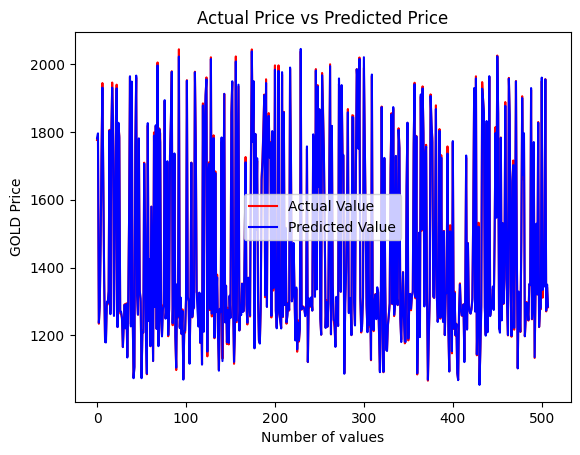

In [63]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()